In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle 
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import EarlyStopping

print(tf.__version__)

2.6.0


In [2]:
df = pd.read_pickle('bpm_big_data_ex_std.plk') 
df

,bunch_charge,num_bunches,V125,H125,connection,reps,C1,C2,C3,C4,...,B605PH_std,B605PV_std,B609PH_std,B609PV_std,B610PH_std,B610PV_std,B612PH_std,B612PV_std,B613PH_std,B613PV_std
0,250,50,-0.3452,0.5357,Upstream,300,0.125787,0.130386,0.523158,0.448682,...,242.156789,219.597515,161.013838,157.417929,213.004640,157.617959,246.976467,241.559555,189.946300,142.303250
1,250,50,-0.3452,0.5357,Upstream,300,0.124891,0.122449,0.504881,0.429264,...,288.396030,216.088618,139.333850,156.589939,192.881741,140.235060,241.478883,222.563772,160.001185,165.372739
2,250,50,-0.3452,0.5357,Upstream,300,0.124635,0.120322,0.505017,0.427904,...,333.283321,164.506662,150.401965,148.781042,230.306773,170.802851,260.509903,204.933165,179.676109,150.015966
3,250,50,-0.3452,0.5357,Upstream,300,0.118786,0.116632,0.478015,0.401456,...,337.385941,210.200329,146.325961,157.866857,174.420867,174.777828,288.771241,206.283748,192.492028,162.731326
4,250,50,-0.3452,0.5357,Upstream,300,0.133275,0.131215,0.530097,0.450509,...,320.810397,219.806615,147.005299,175.304348,198.113168,175.360509,222.726873,192.976742,175.453032,139.124687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17595,250,1,0.0000,-1.0000,Downstream,300,0.164531,0.213478,0.194903,0.181066,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17596,250,1,0.0000,-1.0000,Downstream,300,0.150945,0.206443,0.184874,0.175678,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17597,250,1,0.0000,-1.0000,Downstream,300,0.144606,0.196726,0.178423,0.168635,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17598,250,1,0.0000,-1.0000,Downstream,300,0.144625,0.196734,0.177356,0.169459,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
# Define variable to predict
output = 'B441PV_std'

df = df[['bunch_charge', 'num_bunches', 'V125', 'H125', 'connection', 'reps', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', output]]
convert_dict = {'bunch_charge': int, 'num_bunches': float, 'reps': float} 
df = df.astype(convert_dict)
df

,bunch_charge,num_bunches,V125,H125,connection,reps,C1,C2,C3,C4,C5,C6,C7,C8,B441PV_std
0,250,50.0,-0.3452,0.5357,Upstream,300.0,0.125787,0.130386,0.523158,0.448682,0.145888,0.057161,0.024682,0.044126,138.656559
1,250,50.0,-0.3452,0.5357,Upstream,300.0,0.124891,0.122449,0.504881,0.429264,0.137149,0.051645,0.022580,0.039295,109.398381
2,250,50.0,-0.3452,0.5357,Upstream,300.0,0.124635,0.120322,0.505017,0.427904,0.136774,0.050708,0.022454,0.038037,112.492225
3,250,50.0,-0.3452,0.5357,Upstream,300.0,0.118786,0.116632,0.478015,0.401456,0.127130,0.045398,0.020581,0.031735,115.484824
4,250,50.0,-0.3452,0.5357,Upstream,300.0,0.133275,0.131215,0.530097,0.450509,0.146080,0.055430,0.024999,0.041351,120.711042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17595,250,1.0,0.0000,-1.0000,Downstream,300.0,0.164531,0.213478,0.194903,0.181066,0.155166,0.128281,0.129489,0.117805,0.000000
17596,250,1.0,0.0000,-1.0000,Downstream,300.0,0.150945,0.206443,0.184874,0.175678,0.150810,0.122212,0.130741,0.113964,0.000000
17597,250,1.0,0.0000,-1.0000,Downstream,300.0,0.144606,0.196726,0.178423,0.168635,0.147421,0.119185,0.127410,0.109986,0.000000
17598,250,1.0,0.0000,-1.0000,Downstream,300.0,0.144625,0.196734,0.177356,0.169459,0.146780,0.120936,0.129253,0.111885,0.000000


In [4]:
df = df[df.num_bunches == 50]
df

,bunch_charge,num_bunches,V125,H125,connection,reps,C1,C2,C3,C4,C5,C6,C7,C8,B441PV_std
0,250,50.0,-0.3452,0.5357,Upstream,300.0,0.125787,0.130386,0.523158,0.448682,0.145888,0.057161,0.024682,0.044126,138.656559
1,250,50.0,-0.3452,0.5357,Upstream,300.0,0.124891,0.122449,0.504881,0.429264,0.137149,0.051645,0.022580,0.039295,109.398381
2,250,50.0,-0.3452,0.5357,Upstream,300.0,0.124635,0.120322,0.505017,0.427904,0.136774,0.050708,0.022454,0.038037,112.492225
3,250,50.0,-0.3452,0.5357,Upstream,300.0,0.118786,0.116632,0.478015,0.401456,0.127130,0.045398,0.020581,0.031735,115.484824
4,250,50.0,-0.3452,0.5357,Upstream,300.0,0.133275,0.131215,0.530097,0.450509,0.146080,0.055430,0.024999,0.041351,120.711042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17295,250,50.0,0.0000,-1.0000,Downstream,300.0,0.617900,0.660846,0.705875,0.617443,0.640925,0.235454,0.163863,0.561070,421.549529
17296,250,50.0,0.0000,-1.0000,Downstream,300.0,0.588883,0.636128,0.675733,0.594999,0.615192,0.227115,0.157787,0.543192,393.252944
17297,250,50.0,0.0000,-1.0000,Downstream,300.0,0.589507,0.627817,0.656347,0.575578,0.597116,0.217992,0.153769,0.520809,419.866253
17298,250,50.0,0.0000,-1.0000,Downstream,300.0,0.605714,0.657009,0.697370,0.616061,0.629490,0.235262,0.165373,0.565146,461.232342


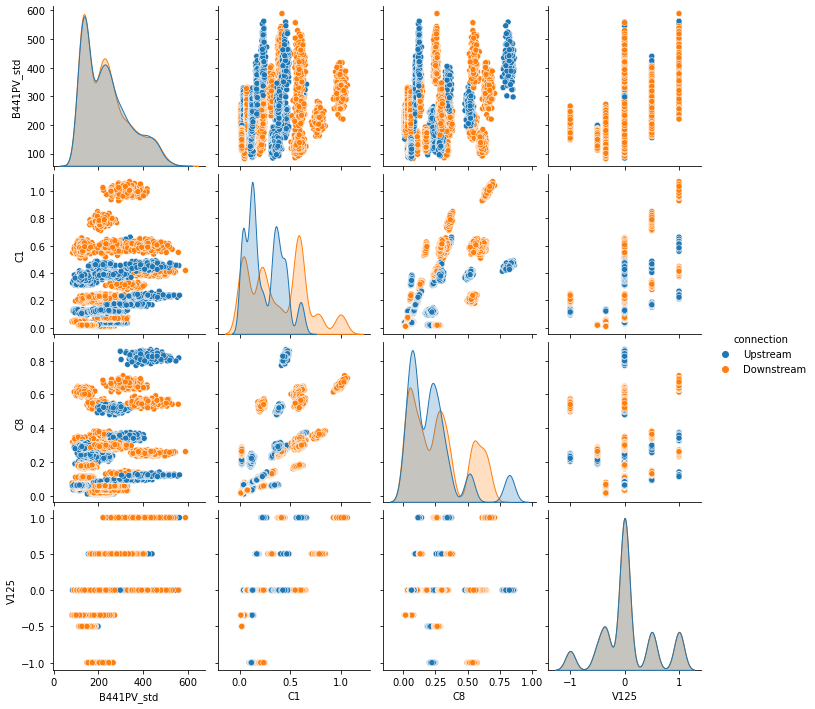

In [5]:
sns.pairplot(df[[output, 'C1', 'C8', 'V125', 'connection']], diag_kind='kde', hue='connection') # Just plot some relationships

In [6]:
df = pd.get_dummies(df, prefix='', prefix_sep='', columns=['connection']) # Change to categorical data
df.tail()

,bunch_charge,num_bunches,V125,H125,reps,C1,C2,C3,C4,C5,C6,C7,C8,B441PV_std,Downstream,Upstream
17295,250,50.0,0.0,-1.0,300.0,0.617900,0.660846,0.705875,0.617443,0.640925,0.235454,0.163863,0.561070,421.549529,1,0
17296,250,50.0,0.0,-1.0,300.0,0.588883,0.636128,0.675733,0.594999,0.615192,0.227115,0.157787,0.543192,393.252944,1,0
17297,250,50.0,0.0,-1.0,300.0,0.589507,0.627817,0.656347,0.575578,0.597116,0.217992,0.153769,0.520809,419.866253,1,0
17298,250,50.0,0.0,-1.0,300.0,0.605714,0.657009,0.697370,0.616061,0.629490,0.235262,0.165373,0.565146,461.232342,1,0
17299,250,50.0,0.0,-1.0,300.0,0.549925,0.618356,0.664781,0.602607,0.592923,0.226765,0.155918,0.547954,503.042383,1,0


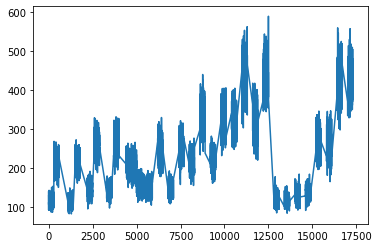

In [7]:
plt.plot(df[output])

In [8]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)
train_dataset.info()
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7680 entries, 11277 to 8732
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bunch_charge  7680 non-null   int64  
 1   num_bunches   7680 non-null   float64
 2   V125          7680 non-null   float64
 3   H125          7680 non-null   float64
 4   reps          7680 non-null   float64
 5   C1            7680 non-null   float64
 6   C2            7680 non-null   float64
 7   C3            7680 non-null   float64
 8   C4            7680 non-null   float64
 9   C5            7680 non-null   float64
 10  C6            7680 non-null   float64
 11  C7            7680 non-null   float64
 12  C8            7680 non-null   float64
 13  B441PV_std    7680 non-null   float64
 14  Downstream    7680 non-null   uint8  
 15  Upstream      7680 non-null   uint8  
dtypes: float64(13), int64(1), uint8(2)
memory usage: 915.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19

In [9]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bunch_charge,7680.0,203.476562,69.388128,100.000000,100.000000,250.000000,250.000000,250.000000
num_bunches,7680.0,50.000000,0.000000,50.000000,50.000000,50.000000,50.000000,50.000000
V125,7680.0,0.050871,0.498742,-1.000000,-0.345200,0.000000,0.500000,1.000000
H125,7680.0,0.068427,0.433911,-1.000000,0.000000,0.000000,0.500000,1.000000
reps,7680.0,300.000000,0.000000,300.000000,300.000000,300.000000,300.000000,300.000000
C1,7680.0,0.319079,0.249200,0.008735,0.116379,0.295474,0.531960,1.068441
C2,7680.0,0.322571,0.240979,0.018803,0.135808,0.257873,0.521599,0.970462
C3,7680.0,0.359300,0.305233,0.015022,0.119783,0.266635,0.525832,1.400255
C4,7680.0,0.390910,0.316656,0.031799,0.164944,0.270658,0.537590,1.511656
C5,7680.0,0.330547,0.260107,0.013013,0.127251,0.291536,0.479220,1.172247


In [10]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop(output)
test_labels = test_features.pop(output)

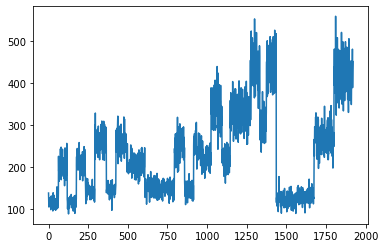

In [11]:
plt.plot(np.array(test_labels))

In [41]:
# Linear Regression with multiple inputs 
normalizer_array = np.array(train_features[['C1', 'C2', 'C3', 'C4', 
                                            'C5', 'C6', 'C7', 'C8', 
                                            'V125', 
                                            'Downstream', 'Upstream',
                                           'bunch_charge','H125']])
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(normalizer_array))
print(normalizer.mean.numpy())

[[3.1907958e-01 3.2257089e-01 3.5929987e-01 3.9090958e-01 3.3054677e-01
  1.2858579e-01 9.0711802e-02 2.5239673e-01 5.0871309e-02 5.0273436e-01
  4.9726564e-01 2.0347659e+02 6.8427376e-02]]


In [42]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
linear_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_5 (Normalizati (None, 13)                27        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 14        
Total params: 41
Trainable params: 14
Non-trainable params: 27
_________________________________________________________________


In [43]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error',
    metrics=['mean_squared_error', 'mean_absolute_percentage_error'])

In [44]:
%%time
early_stop =EarlyStopping(monitor='val_loss', min_delta=0.1, patience=100)
history = linear_model.fit(
    normalizer_array, train_labels, 
    epochs=1000,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2,
    callbacks=[early_stop])

CPU times: user 1min 21s, sys: 9.39 s, total: 1min 30s
Wall time: 58.7 s


In [45]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_squared_error,mean_absolute_percentage_error,val_loss,val_mean_squared_error,val_mean_absolute_percentage_error,epoch
491,25.594961,1215.474487,11.146149,25.522547,1225.237427,10.994545,491
492,25.660830,1228.618286,11.156564,25.445997,1216.202515,10.942852,492
493,25.624939,1220.980347,11.148973,25.693655,1242.811157,10.992114,493
494,25.644188,1220.869263,11.169307,25.472452,1216.967407,10.941310,494
495,25.611969,1218.701782,11.145444,25.512091,1232.221436,10.910619,495


In [46]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [B441PV_var]')
  plt.ylim([0, 50])
  plt.legend()
  plt.grid(True)

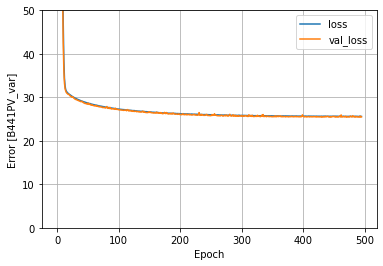

In [47]:
plot_loss(history)

In [48]:
test_results = {}

test_results['linear_model'] = linear_model.evaluate(
    test_features[['C1', 'C2', 'C3', 'C4', 
                   'C5', 'C6', 'C7', 'C8', 
                   'V125', 
                   'Downstream', 'Upstream',
                   'bunch_charge','H125']],
    test_labels, verbose=0)
test_results

{'linear_model': [26.537324905395508, 1355.0098876953125, 11.294614791870117]}

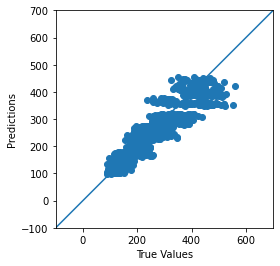

In [49]:
test_predictions_linear_model = linear_model.predict(test_features[['C1', 'C2', 'C3', 'C4', 
                                            'C5', 'C6', 'C7', 'C8', 
                                            'V125', 
                                            'Downstream', 'Upstream',
                                           'bunch_charge','H125']]).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions_linear_model)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [-100, 700]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

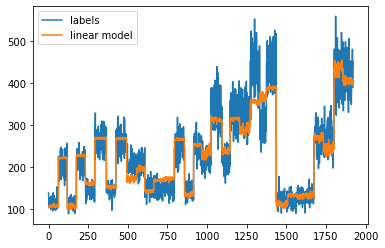

In [50]:
# Plot test labels and test predictiones vs sample #
plt.plot(np.array(test_labels), label='labels')
plt.plot(np.array(test_predictions_linear_model), label='linear model')
plt.legend()

In [51]:
# Now let's use a DNN
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(100, activation='relu'),
      layers.Dense(100, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.00001),
               metrics=['mean_squared_error', 'mean_absolute_percentage_error'])
  return model

In [52]:
# Now lets do the full model
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_5 (Normalizati (None, 13)                27        
_________________________________________________________________
dense_3 (Dense)              (None, 100)               1400      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 32)               

In [53]:
%%time
early_stop =EarlyStopping(monitor='val_loss', min_delta=0.1, patience=300)
history = dnn_model.fit(
    normalizer_array, train_labels,
    validation_split=0.2,
    verbose=0, epochs=1000,
    callbacks=[early_stop])

CPU times: user 6min 14s, sys: 1min 23s, total: 7min 37s
Wall time: 2min 55s


In [55]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_squared_error,mean_absolute_percentage_error,val_loss,val_mean_squared_error,val_mean_absolute_percentage_error,epoch
543,19.059320,658.090576,8.353363,19.314388,677.497131,8.382440,543
544,19.057749,657.778381,8.349940,19.310453,677.967651,8.350737,544
545,19.055769,657.792297,8.345418,19.307772,676.536682,8.383780,545
546,19.050226,658.460876,8.347116,19.319532,678.533508,8.344710,546
547,19.061398,658.242249,8.344712,19.306648,677.254700,8.347981,547


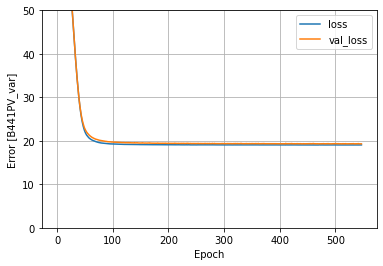

In [56]:
plot_loss(history)

In [59]:
test_results['dnn_model'] = dnn_model.evaluate(test_features[['C1', 'C2', 'C3', 'C4', 
                   'C5', 'C6', 'C7', 'C8', 
                   'V125', 
                   'Downstream', 'Upstream',
                   'bunch_charge','H125']], 
                test_labels, verbose=0)
test_results

{'linear_model': [26.537324905395508, 1355.0098876953125, 11.294614791870117],
 'dnn_model': [19.548723220825195, 719.190185546875, 8.428348541259766]}

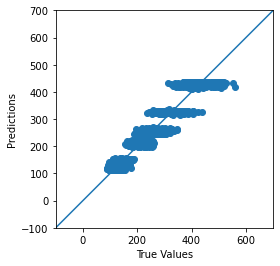

In [61]:
test_predictions_dnn_model = dnn_model.predict(test_features[['C1', 'C2', 'C3', 'C4', 
                   'C5', 'C6', 'C7', 'C8', 
                   'V125', 
                   'Downstream', 'Upstream',
                   'bunch_charge','H125']]).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions_dnn_model)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [-100, 700]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

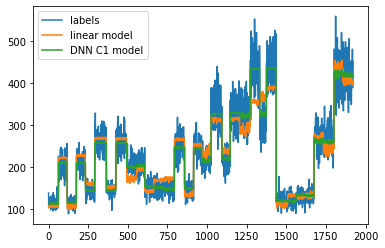

In [62]:
# Plot test labels and test predictiones vs sample #
plt.plot(np.array(test_labels), label='labels')
plt.plot(np.array(test_predictions_linear_model), label='linear model')
plt.plot(np.array(test_predictions_dnn_model), label='DNN C1 model')
plt.legend()

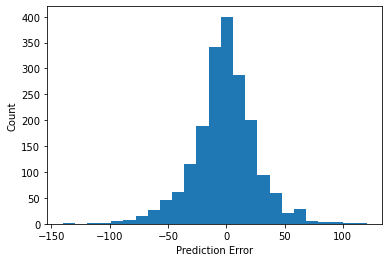

In [63]:
error = test_predictions_dnn_model - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

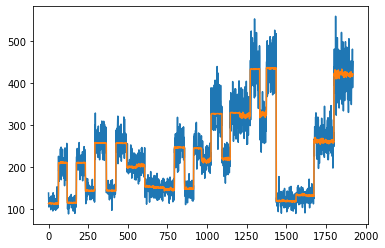

In [64]:
plt.plot(np.array(test_labels))
plt.plot(np.array(test_predictions_dnn_model))

In [65]:
# Let's compare the test results of the models
pd.DataFrame(test_results, index=['Mean absolute error', 'mean_squared_error', 'mean_absolute_percentage_error']).T

,Mean absolute error,mean_squared_error,mean_absolute_percentage_error
linear_model,26.537325,1355.009888,11.294615
dnn_model,19.548723,719.190186,8.428349


Done!